In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

data_path = '../input/data_global.xlsx'
data = pd.read_excel(data_path)

In [2]:
data.shape  

(147, 847)

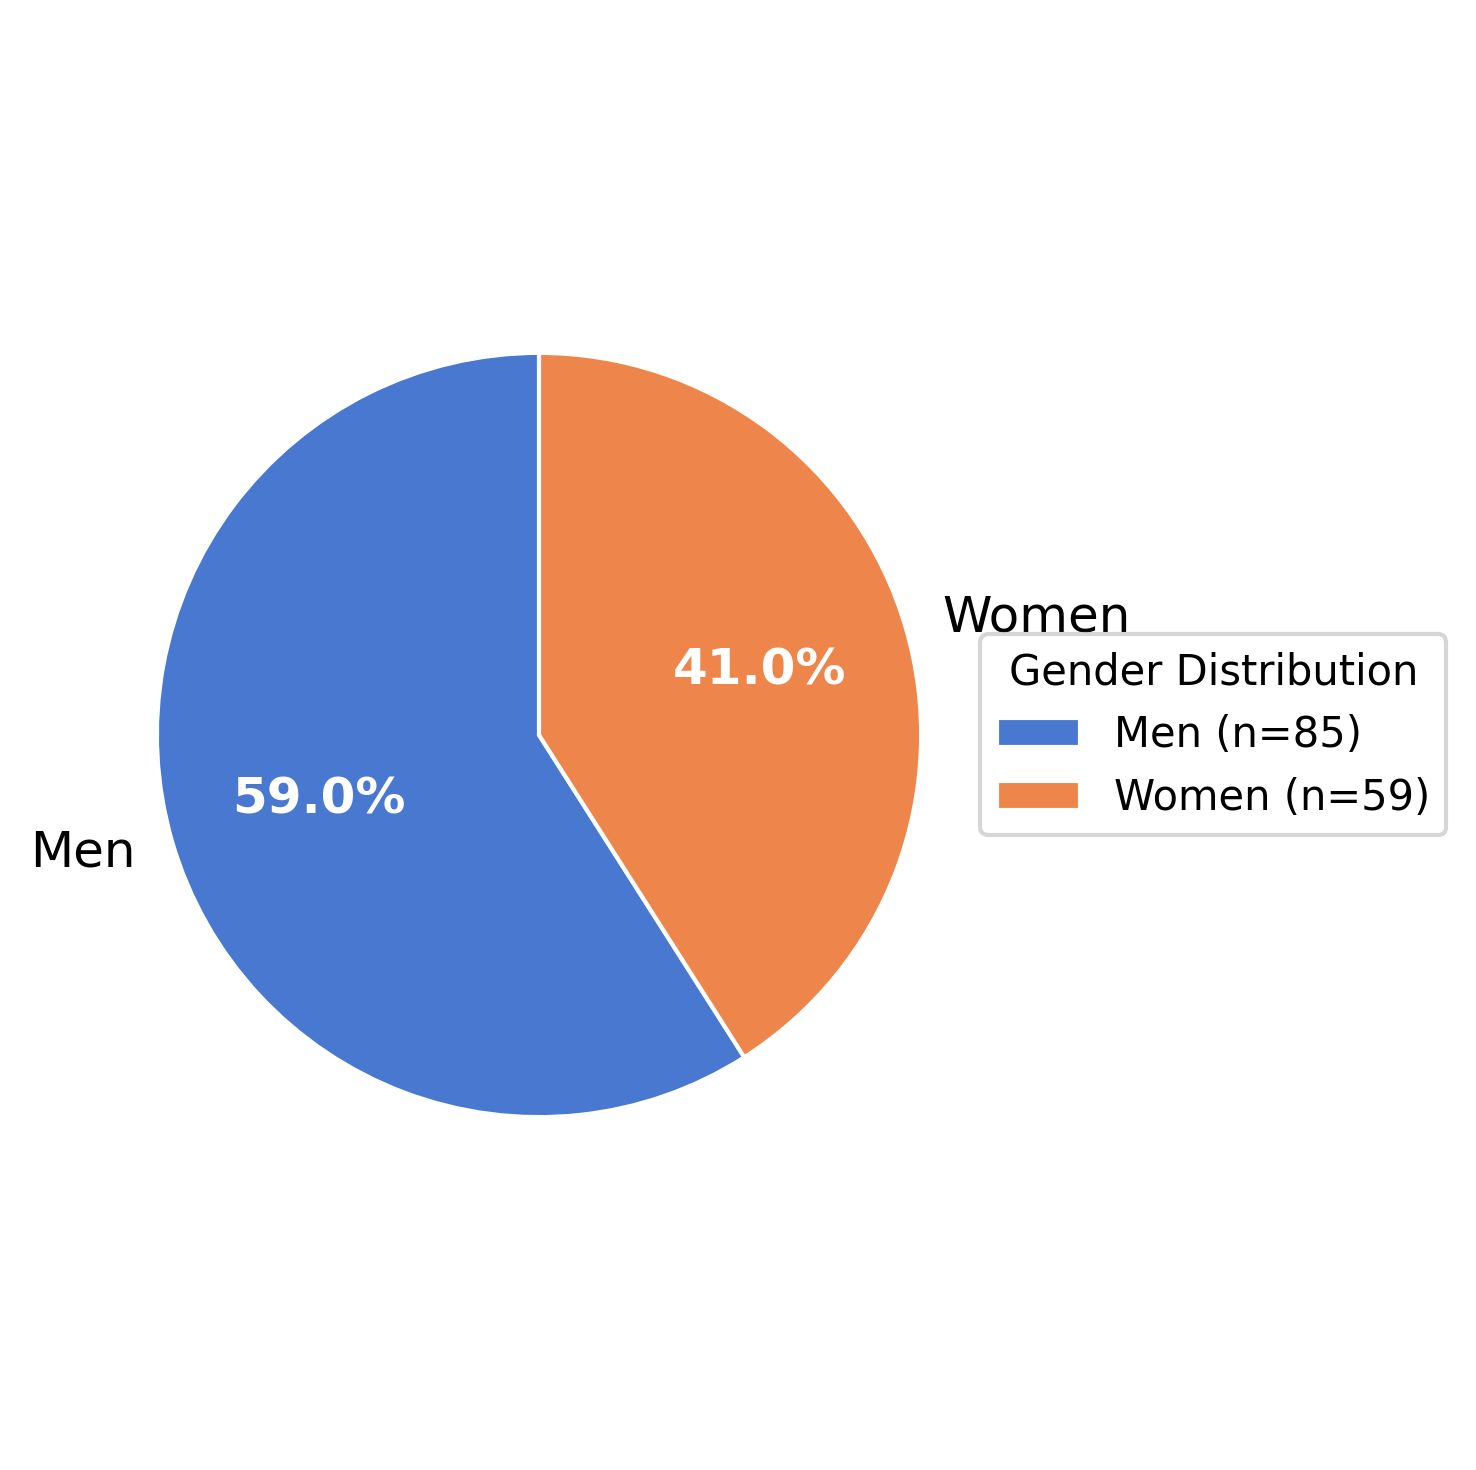

In [6]:
# Remap the numeric gender codes to text labels
gender_counts = data['Sexe'].value_counts()
gender_labels = {0: 'Men', 1: 'Women'}

# Create figure with publication-quality settings
fig, ax = plt.subplots(figsize=(5, 5), dpi=300)

# Define professional colors - blue for men, pink for women
colors = ['#4878D0', '#EE854A']  

# Create the pie chart
wedges, texts, autotexts = ax.pie(
    gender_counts, 
    labels=[gender_labels[i] for i in gender_counts.index], 
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    wedgeprops={'edgecolor': 'w', 'linewidth': 1},
    textprops={'fontsize': 12}
)

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')  

# Style the percentage text
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

# Add counts in the legend
legend_labels = [f'{gender_labels[i]} (n={count})' for i, count in zip(gender_counts.index, gender_counts)]
ax.legend(wedges, legend_labels, title="Gender Distribution", 
          loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.tight_layout()
plt.show()

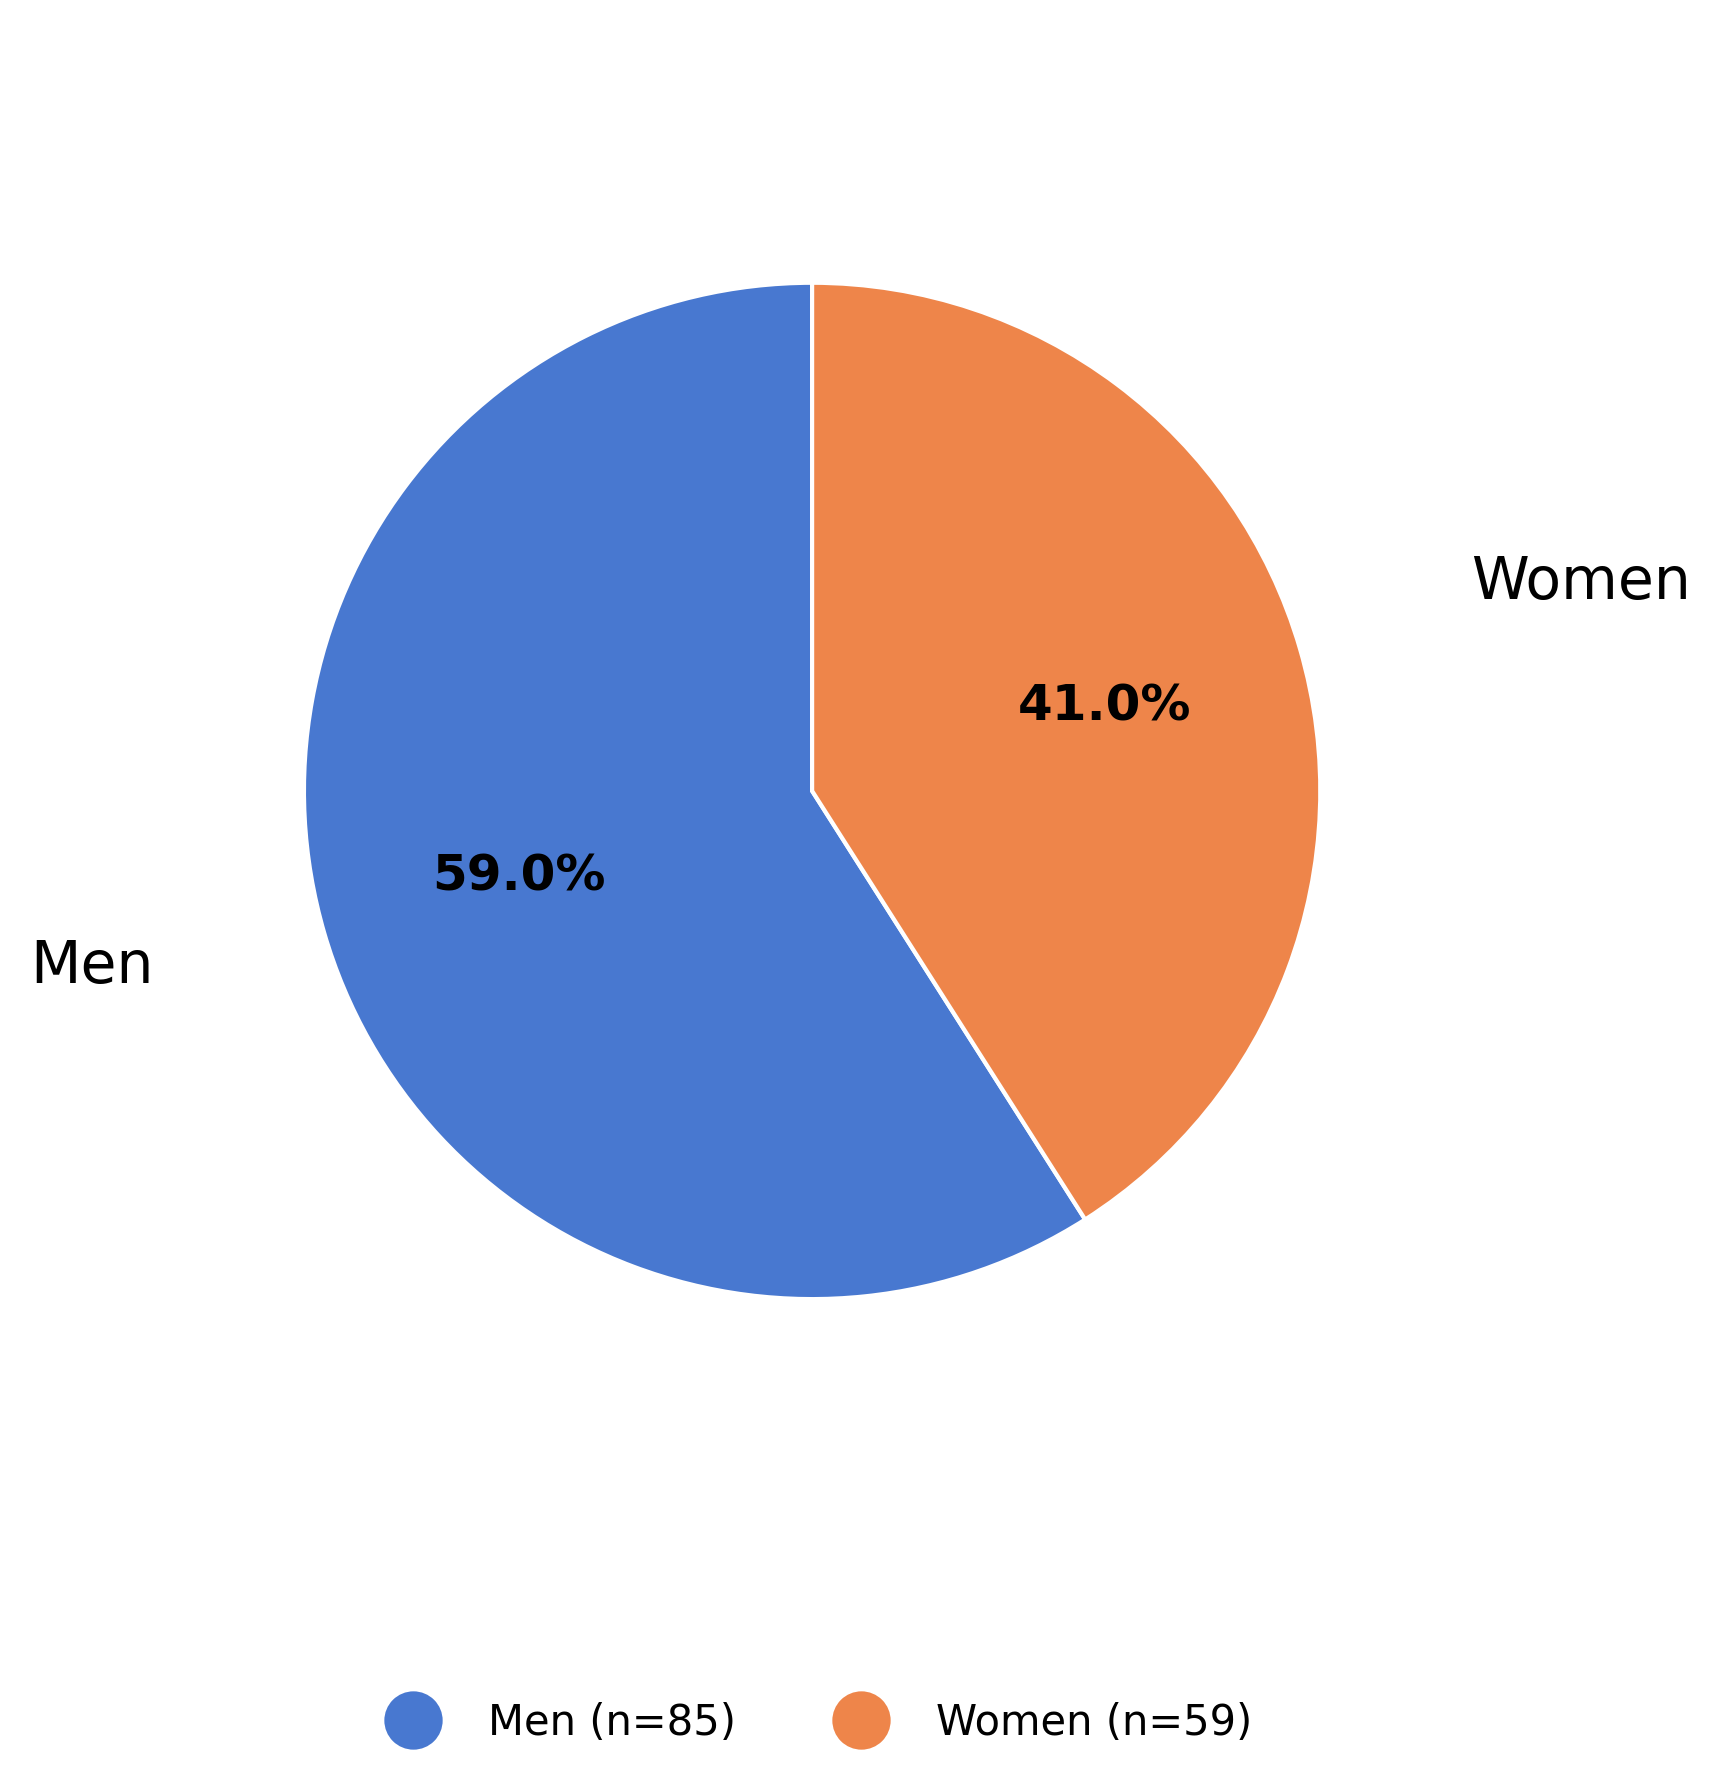

In [8]:

# Assuming 'data' is your DataFrame and 'Gender' is your gender column
gender_counts = data['Sexe'].value_counts()
gender_labels = {0: 'Men', 1: 'Women'}

# Create figure with publication-quality settings
fig, ax = plt.subplots(figsize=(6, 6), dpi=300)

# Define professional colors
colors = ['#4878D0', '#EE854A']  

# Create the pie chart without labels (we'll add them directly)
wedges, _, autotexts = ax.pie(
    gender_counts, 
    labels=None,  # Remove the labels
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    wedgeprops={'edgecolor': 'w', 'linewidth': 1},
    textprops={'fontsize': 12, 'fontweight': 'bold'}
)

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')  

# Add labels directly next to the wedges
for i, wedge in enumerate(wedges):
    angle = (wedge.theta1 + wedge.theta2) / 2
    x = np.cos(np.deg2rad(angle))
    y = np.sin(np.deg2rad(angle))
    
    # Determine horizontal alignment based on angle
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    
    # Adjust position slightly outward from the wedge
    connectionstyle = "angle,angleA=0,angleB={}".format(angle)
    
    # Add the text with the gender label
    ax.annotate(
        gender_labels[gender_counts.index[i]], 
        xy=(x, y), 
        xytext=(1.35*x, 1.35*y),
        horizontalalignment=horizontalalignment,
        fontsize=14
    )

# Add a simple legend at the bottom
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[0], markersize=15, label=f'Men (n={gender_counts.get(0, 0)})'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[1], markersize=15, label=f'Women (n={gender_counts.get(1, 0)})')
]

ax.legend(handles=legend_elements, loc='lower center', bbox_to_anchor=(0.5, -0.15), frameon=False, ncol=2)

plt.tight_layout()
plt.show()

C:\Users\matth\AppData\Local\Temp\ipykernel_20864\3540297499.py:11: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  sparsity, missing, total = calculate_sparsity(data)


Data sparsity: 22.94%
Missing values: 28560 out of 124509 cells


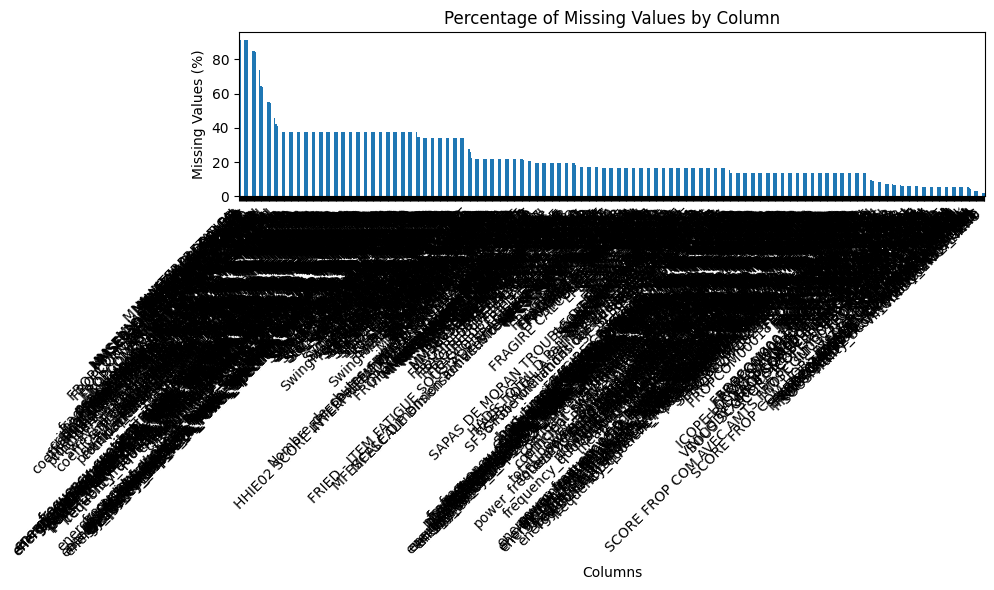

In [9]:
# Calculate sparsity (percentage of missing values)
def calculate_sparsity(data):
    # Total number of cells
    total_cells = np.product(data.shape)
    # Number of missing cells
    missing_cells = data.isna().sum().sum()
    # Sparsity percentage
    sparsity_percentage = (missing_cells / total_cells) * 100
    return sparsity_percentage, missing_cells, total_cells

sparsity, missing, total = calculate_sparsity(data)
print(f"Data sparsity: {sparsity:.2f}%")
print(f"Missing values: {missing} out of {total} cells")

# Visualize missing data by column
plt.figure(figsize=(10, 6))
missing_by_column = data.isna().sum().sort_values(ascending=False)
missing_percent = (missing_by_column / len(data)) * 100

# Only show columns with missing values
missing_percent = missing_percent[missing_percent > 0]

if len(missing_percent) > 0:
    missing_percent.plot(kind='bar')
    plt.title('Percentage of Missing Values by Column')
    plt.xlabel('Columns')
    plt.ylabel('Missing Values (%)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("No missing values found in the dataset.")

<Axes: xlabel='Frailty_State_GFST'>

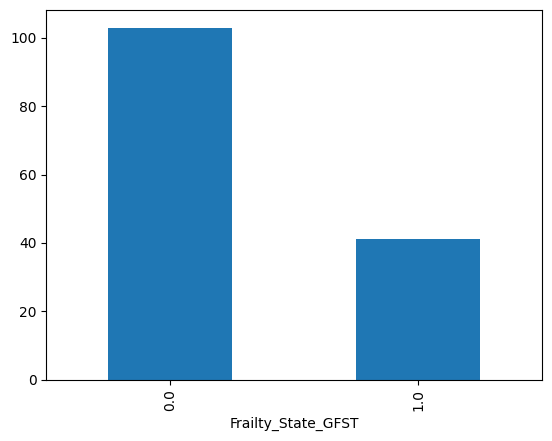

In [9]:
# Plot class distribution to check for class imbalance
data['Frailty_State_GFST'].value_counts().plot(kind='bar')



<Axes: xlabel='Fried_State'>

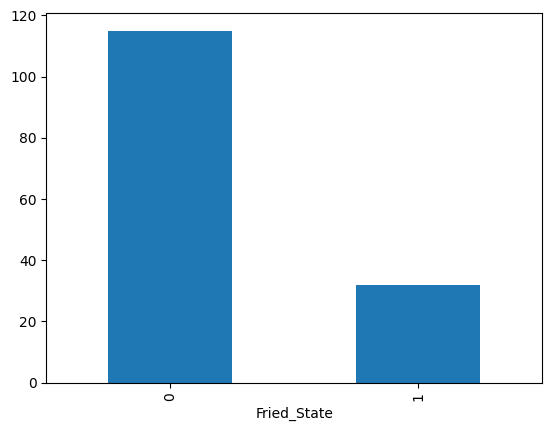

In [10]:
# class imbalance for FRIED
data['Fried_State'].value_counts().plot(kind='bar')

In [15]:
pos_weight_class_fried= len(data['Fried_State'] - np.sum(data['Fried_State'])) / np.sum(data['Fried_State'])
print(pos_weight_class_fried)

pos_weight_class_gfst= len(data['Frailty_State_GFST'] - np.sum(data['Frailty_State_GFST'])) / np.sum(data['Frailty_State_GFST'])
print(pos_weight_class_gfst)


# Or : sum(negative_class) / sum(positive_class)
fried_ratio = np.sum(data['Fried_State']) / np.sum(data['Fried_State'])
print(fried_ratio)

gfst_ratio = np.sum(data['Frailty_State_GFST']) / np.sum(data['Frailty_State_GFST'])
print(gfst_ratio)

4.59375
3.5853658536585367
1.0
1.0


In [6]:
# merge data
# datasets shape
print(df_questions.shape, df_gait.shape, df_posture.shape, df_grip.shape)

# merge
df_merged = pd.merge(df_questions, df_posture, on='Foldername', how='outer')
df_merged = pd.merge(df_merged, df_gait, on='Foldername', how='outer')
df_merged = pd.merge(df_merged, df_grip, on='Foldername', how='outer')

df_merged.shape

(144, 421) (115, 108) (127, 312) (96, 14)


(147, 852)

In [13]:
# encode False -> 0, True -> 1 in all columns
def custom_encoding(x):
    if x == False:
        return 0
    elif x == True:
        return 1
    elif pd.isnull(x):
        return np.nan
    else:
        return x    

df_merged = df_merged.applymap(custom_encoding)


C:\Users\matth\AppData\Local\Temp\ipykernel_19244\3867387058.py:12: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_merged = df_merged.applymap(custom_encoding)


In [14]:
# save
df_merged.to_excel('../input/data_merged.xlsx', index=False)

In [7]:
object_columns = data.select_dtypes(include=['object']).columns

print(object_columns)

Index(['Foldername', 'bilan_date_baseline_romberg',
       'bilan_date_follow-up_romberg'],
      dtype='object')
